# GSE7430 figures

Before launch corresponding .
```
git checkout https://github.com/JetBrains-Research/sc-atacseq-smk-pipeline
cd sc-atacseq-smk-pipeline

for Q in 0.1 0.5 0.01 1E-4 1E-6 1E-9 1E-12; do 
    echo $Q; 
    snakemake all --cores 24 --use-conda --config work_dir=/mnt/stripe/shpynov/GSE74310/ \ 
        fastq_dir=/mnt/stripe/shpynov/GSE74310/fastq/  indexes=/mnt/stripe/dievsky/issue75/indexes2/hg19 \
        macs2_suffix="q${Q}" macs2_stats="-q ${Q}"; 
done
```


In [44]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import os;
from pybedtools import BedTool;
import subprocess;
import math;

In [98]:
CELLS = ["Monocyte", 
         "acute_myeloid_leukemia_blast_cell", 
         "acute_myeloid_leukemia_leukmeia_stem_cell", 
         "lymphoid_primed_multipotent_progenitor"]
EXPERIMENT_FOLDER = "/mnt/stripe/shpynov/GSE74310"
# Switch to the same Q values as SPAN
# MACS2_PS = ["0.001", "0.0001", "0.00001"]
# Use same settings as for SPAN
QS = ["0.5", "0.1", "0.01", "1E-4", "1E-6", "1E-9", "1E-12"]
MACS2_QS = QS
# discover MACS2 peak files
macs2_peaks_paths = {}
for cell in CELLS:
    macs2_peaks_paths[cell] = {
        q: os.path.join(EXPERIMENT_FOLDER, "cleaned_cell_peaks", "macs2",
                        "{}_q{}_peaks.narrowPeak".format(cell, q)) for q in MACS2_QS}
macs2_peaks_paths["total_pooled_data"] = {
    q: os.path.join(EXPERIMENT_FOLDER, "cleaned_all_peaks", "macs2",
                    "pooled_q{}_peaks.narrowPeak".format(q)) for q in MACS2_QS}

# discover Span model files and BAMs
SPAN_BINS = ["100"]
span_model_paths = {}
bam_paths = {}
for cell in CELLS:
    bam_paths[cell] = os.path.join(EXPERIMENT_FOLDER, "cleaned_cells", "{}.bam".format(cell))
    span_model_paths[cell] = {span_bin: os.path.join(EXPERIMENT_FOLDER, "cleaned_cell_peaks", "span", "{}_{}.span".format(cell, span_bin)) for span_bin in SPAN_BINS}
bam_paths["total_pooled_data"] = os.path.join(EXPERIMENT_FOLDER, "cleaned_all", "pooled.bam")
span_model_paths["total_pooled_data"] = {span_bin: os.path.join(EXPERIMENT_FOLDER, "cleaned_all_peaks", "span", "pooled_{}.span".format(span_bin)) for span_bin in SPAN_BINS}
SPAN_JAR = os.path.join(EXPERIMENT_FOLDER, "bin", "span-0.11.0.jar")
CELLS.append('total_pooled_data')

# discover monocyte DHSs
# Monocytes DHS was obtained from https://www.encodeproject.org/experiments/ENCSR000EPK/
MONOCYTE_DHS_PATH = os.path.join(EXPERIMENT_FOLDER, "dhs", "monocyte_cd14_dnase_tab.bed")
monocyte_dhs_file = BedTool(MONOCYTE_DHS_PATH)
monocyte_dhs_count = monocyte_dhs_file.count()
CHROM_SIZES = os.path.join(EXPERIMENT_FOLDER, "hg19.chrom.sizes")

In [99]:
main_dataframe = pd.DataFrame(columns=['peak_caller', 'cell', 'q', 'bin', 'gap',
                                       'peak_count', 'dhs_by_peak', 'peak_by_dhs'])

# Populate MACS2 entries

In [100]:
for cell in CELLS:
    for q in MACS2_QS:
        print("Processing {} for q={}".format(cell, q))
        peaks_file = BedTool(macs2_peaks_paths[cell][q])
        peak_count = peaks_file.count()
        if cell == 'Monocyte':
            overlap = peaks_file.intersect(monocyte_dhs_file, wa=True, u=True).count()
            peak_by_dhs = overlap * 100.0 / peak_count            
            overlap = monocyte_dhs_file.intersect(peaks_file, wa=True, u=True).count()
            dhs_by_peak = overlap * 100.0 / monocyte_dhs_count
        else:
            dhs_by_peak = math.nan
            peak_by_dhs = math.nan        
        main_dataframe.loc[len(main_dataframe)] = ('macs2', cell, float(q), math.nan, math.nan,
                                                   peak_count, dhs_by_peak, peak_by_dhs)
main_dataframe.head()

Processing Monocyte for q=0.5
Processing Monocyte for q=0.1
Processing Monocyte for q=0.01
Processing Monocyte for q=1E-4
Processing Monocyte for q=1E-6
Processing Monocyte for q=1E-9
Processing Monocyte for q=1E-12
Processing acute_myeloid_leukemia_blast_cell for q=0.5
Processing acute_myeloid_leukemia_blast_cell for q=0.1
Processing acute_myeloid_leukemia_blast_cell for q=0.01
Processing acute_myeloid_leukemia_blast_cell for q=1E-4
Processing acute_myeloid_leukemia_blast_cell for q=1E-6
Processing acute_myeloid_leukemia_blast_cell for q=1E-9
Processing acute_myeloid_leukemia_blast_cell for q=1E-12
Processing acute_myeloid_leukemia_leukmeia_stem_cell for q=0.5
Processing acute_myeloid_leukemia_leukmeia_stem_cell for q=0.1
Processing acute_myeloid_leukemia_leukmeia_stem_cell for q=0.01
Processing acute_myeloid_leukemia_leukmeia_stem_cell for q=1E-4
Processing acute_myeloid_leukemia_leukmeia_stem_cell for q=1E-6
Processing acute_myeloid_leukemia_leukmeia_stem_cell for q=1E-9
Processing 

,peak_caller,cell,q,bin,gap,peak_count,dhs_by_peak,peak_by_dhs
0,macs2,Monocyte,0.500000,NaN,NaN,57988,34.757700,52.497068
1,macs2,Monocyte,0.100000,NaN,NaN,21311,22.578532,92.027591
2,macs2,Monocyte,0.010000,NaN,NaN,21311,22.578532,92.027591
3,macs2,Monocyte,0.000100,NaN,NaN,10981,12.235933,99.071123
4,macs2,Monocyte,0.000001,NaN,NaN,8675,9.616879,99.596542


# Populate Span entries -- takes 1+ hour

In [101]:
SPAN_FDRS = QS
SPAN_GAPS = ["5"]
for cell in CELLS:
    bam_path = bam_paths[cell]
    for span_bin in SPAN_BINS:    
        model_path = span_model_paths[cell][span_bin]
        work_dir = os.path.dirname(model_path)
        for span_fdr in SPAN_FDRS:
            for span_gap in SPAN_GAPS:
                peaks_path = "/tmp/span_peaks.bed"
                command = ('java -jar {} analyze -t {} --chrom.sizes {} --model {} --bin {} '
                           '--keep-dup true --fragment 0 '
                           '--fdr {} --gap {} --peaks {} --workdir {} --threads 8').format(
                    SPAN_JAR, bam_path, CHROM_SIZES, model_path, span_bin, span_fdr, span_gap, peaks_path, work_dir)
                print('Running ' + command)
                subprocess.run(command, shell=True, check=True)
                peaks_file = BedTool(peaks_path)
                peak_count = peaks_file.count()
                print(peak_count)
                if cell == 'Monocyte':
                    overlap = peaks_file.intersect(monocyte_dhs_file, wa=True, u=True).count()
                    print(overlap)
                    peak_by_dhs = overlap * 100.0 / peak_count
                    overlap = monocyte_dhs_file.intersect(peaks_file, wa=True, u=True).count()
                    print(overlap)
                    dhs_by_peak = overlap * 100.0 / monocyte_dhs_count
                else:
                    peak_by_dhs = math.nan
                    dhs_by_peak = math.nan
                main_dataframe.loc[len(main_dataframe)] = \
                ('span', cell, float(span_fdr), int(span_bin), 
                 int(span_gap), peak_count, dhs_by_peak, peak_by_dhs)

Running java -jar /mnt/stripe/shpynov/GSE74310/bin/span-0.11.0.jar analyze -t /mnt/stripe/shpynov/GSE74310/cleaned_cells/Monocyte.bam --chrom.sizes /mnt/stripe/shpynov/GSE74310/hg19.chrom.sizes --model /mnt/stripe/shpynov/GSE74310/cleaned_cell_peaks/span/Monocyte_100.span --bin 100 --keep-dup true --fragment 0 --fdr 0.5 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/shpynov/GSE74310/cleaned_cell_peaks/span --threads 8
54777
36199
53633
Running java -jar /mnt/stripe/shpynov/GSE74310/bin/span-0.11.0.jar analyze -t /mnt/stripe/shpynov/GSE74310/cleaned_cells/Monocyte.bam --chrom.sizes /mnt/stripe/shpynov/GSE74310/hg19.chrom.sizes --model /mnt/stripe/shpynov/GSE74310/cleaned_cell_peaks/span/Monocyte_100.span --bin 100 --keep-dup true --fragment 0 --fdr 0.1 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/shpynov/GSE74310/cleaned_cell_peaks/span --threads 8
32758
29388
40742
Running java -jar /mnt/stripe/shpynov/GSE74310/bin/span-0.11.0.jar analyze -t /mnt/stripe/shpynov/

230877
Running java -jar /mnt/stripe/shpynov/GSE74310/bin/span-0.11.0.jar analyze -t /mnt/stripe/shpynov/GSE74310/cleaned_cells/acute_myeloid_leukemia_leukmeia_stem_cell.bam --chrom.sizes /mnt/stripe/shpynov/GSE74310/hg19.chrom.sizes --model /mnt/stripe/shpynov/GSE74310/cleaned_cell_peaks/span/acute_myeloid_leukemia_leukmeia_stem_cell_100.span --bin 100 --keep-dup true --fragment 0 --fdr 1E-6 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/shpynov/GSE74310/cleaned_cell_peaks/span --threads 8
230877
Running java -jar /mnt/stripe/shpynov/GSE74310/bin/span-0.11.0.jar analyze -t /mnt/stripe/shpynov/GSE74310/cleaned_cells/acute_myeloid_leukemia_leukmeia_stem_cell.bam --chrom.sizes /mnt/stripe/shpynov/GSE74310/hg19.chrom.sizes --model /mnt/stripe/shpynov/GSE74310/cleaned_cell_peaks/span/acute_myeloid_leukemia_leukmeia_stem_cell_100.span --bin 100 --keep-dup true --fragment 0 --fdr 1E-9 --gap 5 --peaks /tmp/span_peaks.bed --workdir /mnt/stripe/shpynov/GSE74310/cleaned_cell_peaks/spa

In [105]:
main_dataframe.describe()

,q,bin,gap,dhs_by_peak,peak_by_dhs
count,7.000000e+01,35.0,35.0,14.000000,14.000000
mean,8.715729e-02,100.0,5.0,20.963285,91.201387
std,1.731738e-01,0.0,0.0,12.491123,14.168316
min,1.000000e-12,100.0,5.0,4.252142,52.497068
25%,1.000000e-09,100.0,5.0,11.119844,92.027591
50%,1.000000e-04,100.0,5.0,21.051115,97.234506
75%,1.000000e-01,100.0,5.0,28.735579,99.004419
max,5.000000e-01,100.0,5.0,46.838185,99.872188


In [106]:
overlap_dataframe = main_dataframe[np.logical_not(np.isnan(main_dataframe['dhs_by_peak']))]
overlap_dataframe.describe()

,q,bin,gap,dhs_by_peak,peak_by_dhs
count,1.400000e+01,7.0,7.0,14.000000,14.000000
mean,8.715729e-02,100.0,5.0,20.963285,91.201387
std,1.784227e-01,0.0,0.0,12.491123,14.168316
min,1.000000e-12,100.0,5.0,4.252142,52.497068
25%,2.507500e-07,100.0,5.0,11.119844,92.027591
50%,1.000000e-04,100.0,5.0,21.051115,97.234506
75%,7.750000e-02,100.0,5.0,28.735579,99.004419
max,5.000000e-01,100.0,5.0,46.838185,99.872188


# Plot monocyte DHS overlap
NOTE: there is information only about the monocytes

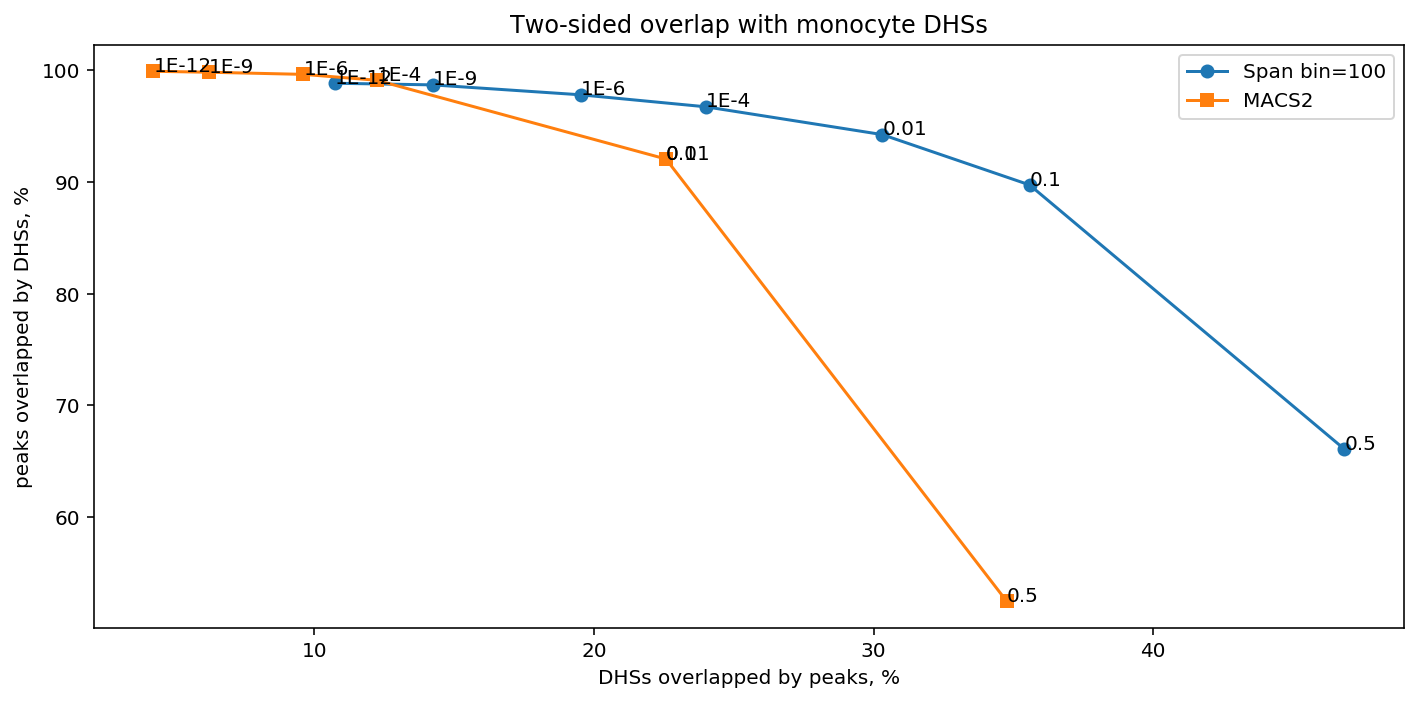

In [107]:
# Only gap=5 is considered for Span
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
for span_bin in SPAN_BINS:
    span_overlap_dataframe = \
    overlap_dataframe[np.logical_and(np.logical_and(overlap_dataframe['peak_caller'] == 'span',
                                                    overlap_dataframe['gap'] == 5),
                                     overlap_dataframe['bin'] == int(span_bin))]
    plt.plot(span_overlap_dataframe['dhs_by_peak'], 
             span_overlap_dataframe['peak_by_dhs'], 
             'o-', 
             label='Span bin=' + span_bin)
    for i,(x,y) in enumerate(zip(
        span_overlap_dataframe['dhs_by_peak'], 
        span_overlap_dataframe['peak_by_dhs'])):
        ax.annotate(str(QS[i]), xy=(x,y))
    
macs2_overlap_dataframe = overlap_dataframe[overlap_dataframe['peak_caller'] == 'macs2']
plt.plot(macs2_overlap_dataframe['dhs_by_peak'], 
         macs2_overlap_dataframe['peak_by_dhs'], 
         's-', label='MACS2')
for i,(x,y) in enumerate(zip(
    macs2_overlap_dataframe['dhs_by_peak'], 
     macs2_overlap_dataframe['peak_by_dhs'])):
    ax.annotate(str(QS[i]), xy=(x,y))

plt.legend()
plt.title("Two-sided overlap with monocyte DHSs")
plt.xlabel("DHSs overlapped by peaks, %")
plt.ylabel("peaks overlapped by DHSs, %")
plt.tight_layout()
plt.savefig('overlap_ROC.png', dpi=300)
plt.show()

# Plot peak counts
Note that leukemia stem cell and lymphoid progenitor failed to fit, as well as leukemia blast cell for bin=50.

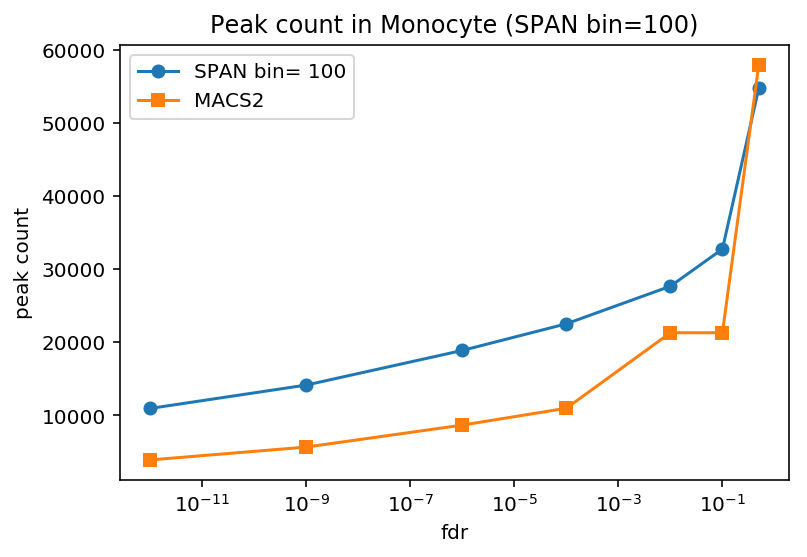

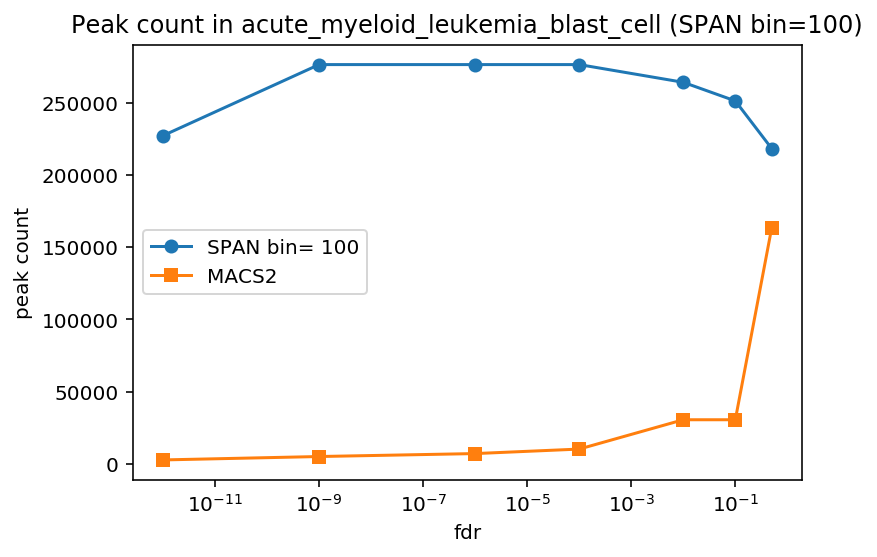

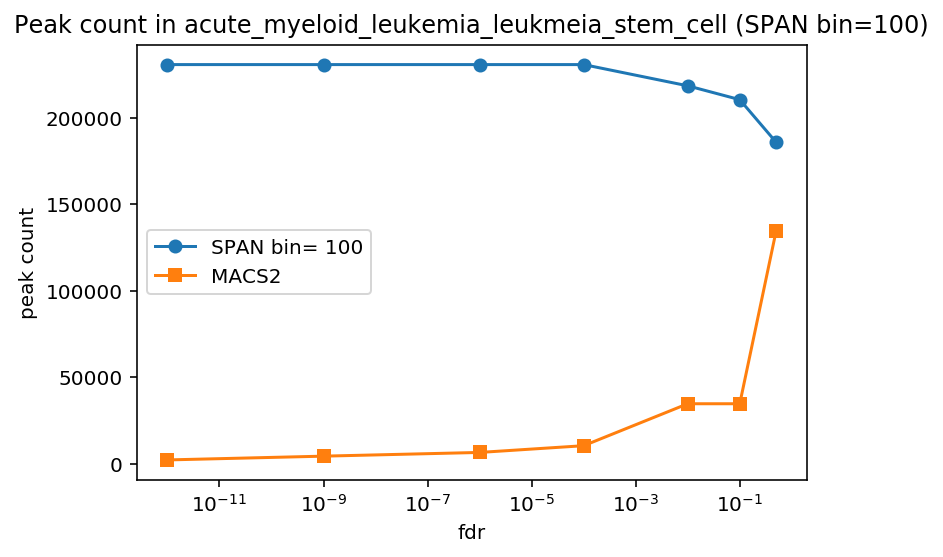

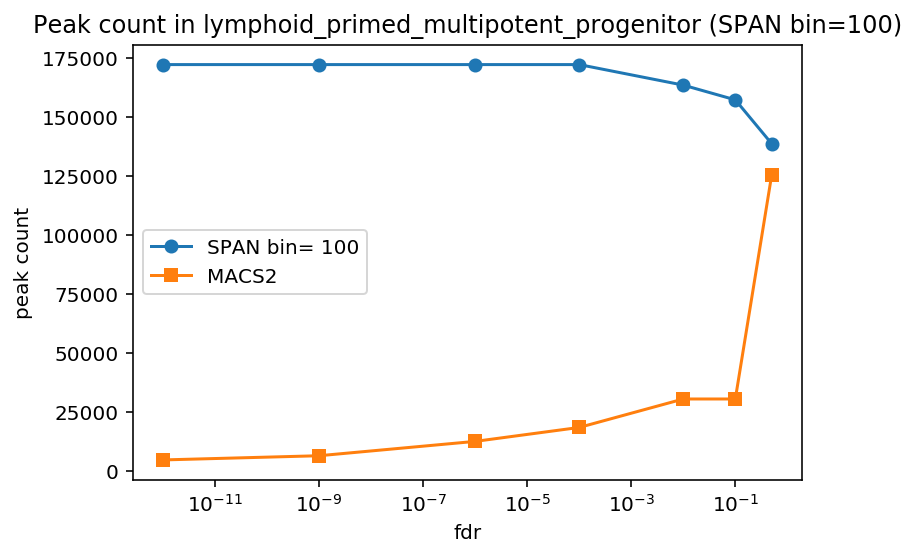

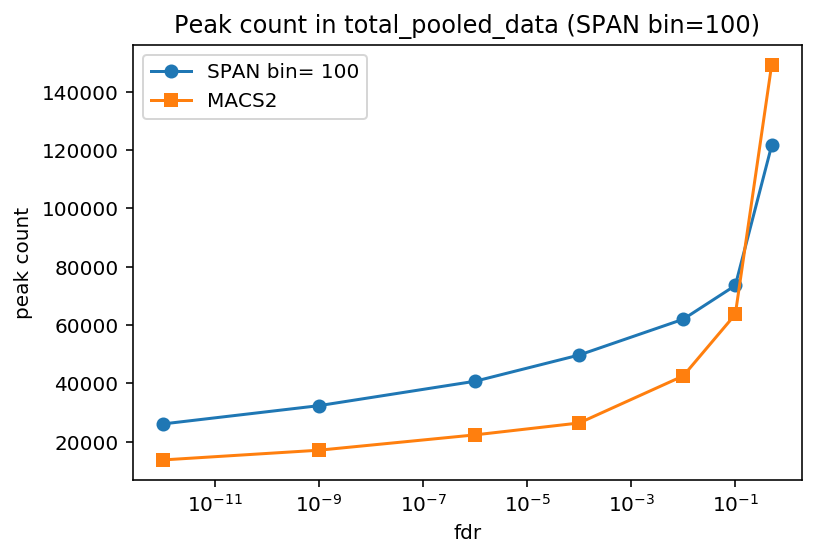

In [108]:
for cell in CELLS:
    for span_bin in SPAN_BINS:
        peak_count_dataframe = main_dataframe[
            np.logical_and(main_dataframe['cell'] == cell,
            np.logical_or(main_dataframe['peak_caller'] == 'macs2', main_dataframe['bin'] == int(span_bin)))]
        span_peak_count_5 = peak_count_dataframe[
            np.logical_and(peak_count_dataframe['peak_caller'] == 'span', peak_count_dataframe['gap'] == 5)]
        plt.plot(span_peak_count_5['q'], span_peak_count_5['peak_count'], 'o-', label='SPAN bin= ' + span_bin)

        macs2_peak_count = peak_count_dataframe[peak_count_dataframe['peak_caller'] == 'macs2']
        plt.plot(macs2_peak_count['q'], macs2_peak_count['peak_count'], 's-', label='MACS2')
        plt.xlabel('fdr')
        plt.xscale('log')
        plt.ylabel('peak count')
        plt.title('Peak count in ' + cell + ' (SPAN bin=' + span_bin + ')')        
        plt.legend()
        plt.show()

# Reworked visualization

In [109]:
# print(monocyte_dhs_count)
mdf = overlap_dataframe[['peak_caller', 'q', 'peak_count', 'dhs_by_peak', 'peak_by_dhs']].copy()
mdf['dhs_ex'] = (np.ones(len(mdf)) - mdf['dhs_by_peak'] / 100) * monocyte_dhs_count
mdf['peaks_ex'] = (np.ones(len(mdf)) - mdf['peak_by_dhs'] / 100) * mdf['peak_count']
mdf['both'] = mdf['peak_by_dhs'] * mdf['peak_count'] / 100
mdf.tail()

,peak_caller,q,peak_count,dhs_by_peak,peak_by_dhs,dhs_ex,peaks_ex,both
37,span,1.000000e-02,27675,30.313431,94.211382,79796.0,1602,26073
38,span,1.000000e-04,22533,24.002026,96.698176,87023.0,744,21789
39,span,1.000000e-06,18886,19.523697,97.770836,92151.0,421,18465
40,span,1.000000e-09,14152,14.233191,98.657434,98209.0,190,13962
41,span,1.000000e-12,10956,10.747815,98.804308,102200.0,131,10825


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


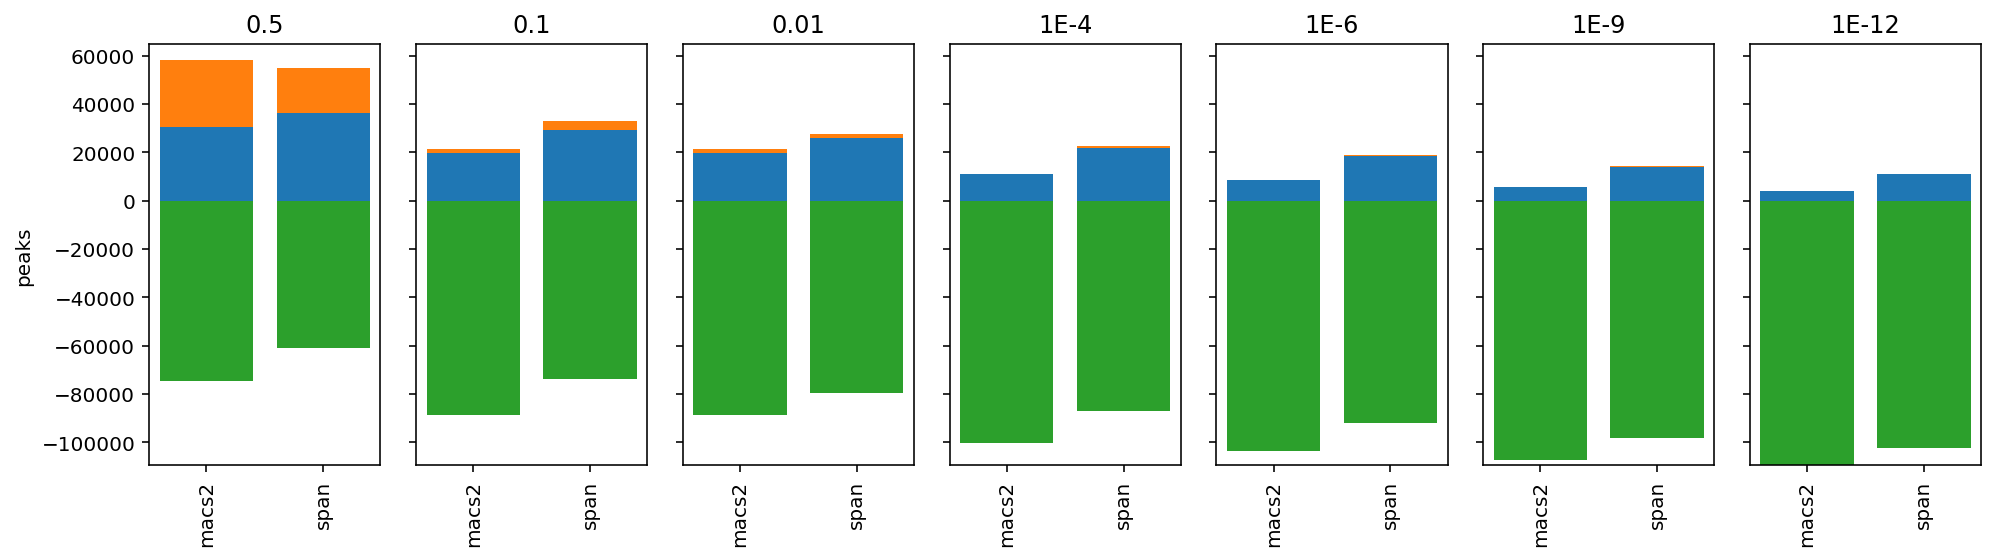

In [116]:
import seaborn as sns

axs = {}

mdf['qp'] = mdf['q'].astype(str) + " " + mdf['peak_caller']
qpl = len(set(mdf['qp']))
fig = plt.figure(figsize=(qpl, 4))
offset = 0
for q in QS:
    data = mdf.loc[mdf['q'] == float(q)]
    xlabels = []
    for t in data['peak_caller']:
        if t not in xlabels:
            xlabels.append(t)
    w = len(set(data['peak_caller']))
    ax = plt.subplot2grid((1, qpl), (0, offset), colspan=w)
    p1 = ax.bar(data['peak_caller'], data['both'])
    p2 = ax.bar(data['peak_caller'], data['peaks_ex'],
                bottom=data['both'])
    p3 = ax.bar(data['peak_caller'], data['dhs_ex'],
                bottom=-data['dhs_ex'])

    ax.legend().set_visible(False)
    axs[ax] = plt.ylim()
    if offset > 0:
        ax.get_yaxis().set_ticklabels([])
        ax.set_ylabel('')
    else:
        ax.set_ylabel('peaks')

    offset += w
    ax.set_xlabel('')
    ax.set_title(q)
    plt.xticks(range(0, len(xlabels)), xlabels, rotation=90)

ymin = np.min([v[0] for v in axs.values()])
ymax = np.max([v[1] for v in axs.values()])

for ax in axs.keys():
    ax.set_ylim(bottom = ymin, top = ymax)
plt.tight_layout()
plt.show()